<a href="https://www.kaggle.com/egemengulpinar/iris-dataset-practise?scriptVersionId=89796613" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
# Author : Hakkı Egemen Gülpınar | 11/03/2022
# I examined and tested IRIS dataset on Kaggle using with matplotlib, also plotly.express and seaborn libraries. 

In [3]:
data = pd.read_csv("/kaggle/input/iris/Iris.csv")
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
print("shape: ", data.shape)
print("data size", data.size)

shape:  (150, 6)
data size 900


In [5]:
data = data.dropna()  # Drop NaN values from the IRIS Dataset (If exist)

In [6]:
print("shape: ", data.shape)
print("data size", data.size)

shape:  (150, 6)
data size 900


In [7]:
data.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [8]:
print("number of unique values : ", data["Species"].nunique())
print("unique labels in IRIS dataset : ", data["Species"].unique())


number of unique values :  3
unique labels in IRIS dataset :  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


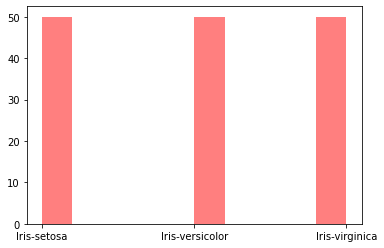

In [9]:
np.random.seed(19680801)
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
plt.hist(data["Species"], color = "red", alpha = 0.5)
#for these results, all labels have equal data 50 | 50 | 50
print(data["Species"].value_counts())

In [10]:
data = data.drop("Id",axis=1)


In [11]:
data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
temp_data = pd.DataFrame(data)
mean_data = temp_data.groupby("Species").mean()
print(mean_data)
mean_data.index


                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa              5.006         3.418          1.464         0.244
Iris-versicolor          5.936         2.770          4.260         1.326
Iris-virginica           6.588         2.974          5.552         2.026


Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object', name='Species')

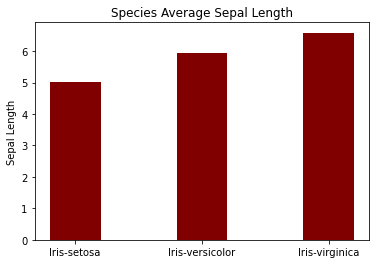

In [13]:
plt.bar(mean_data.index, mean_data["SepalLengthCm"], color ='maroon',
        width = 0.4)
 

plt.ylabel("Sepal Length")
plt.title("Species Average Sepal Length")
plt.show()

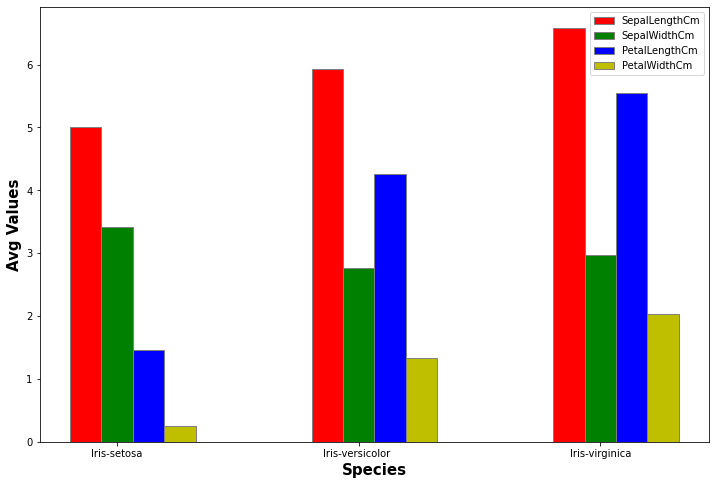

In [14]:
#In this section, I drew all avg species plot results
barWidth = 0.13
fig = plt.subplots(figsize =(12, 8))

 
# Set position of bar on X axis
br1 = np.arange(3)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, mean_data["SepalLengthCm"], color ='r', width = barWidth,
        edgecolor ='grey', label ='SepalLengthCm')
plt.bar(br2, mean_data["SepalWidthCm"], color ='g', width = barWidth,
        edgecolor ='grey', label ='SepalWidthCm')
plt.bar(br3, mean_data["PetalLengthCm"], color ='b', width = barWidth,
        edgecolor ='grey', label ='PetalLengthCm')
plt.bar(br4, mean_data["PetalWidthCm"], color ='y', width = barWidth,
        edgecolor ='grey', label ='PetalWidthCm')
 
# Adding Xticks
plt.xlabel('Species', fontweight ='bold', fontsize = 15)
plt.ylabel('Avg Values', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(3)],
        ['Iris-setosa', 'Iris-versicolor ', 'Iris-virginica'])
 
plt.legend()
plt.show()

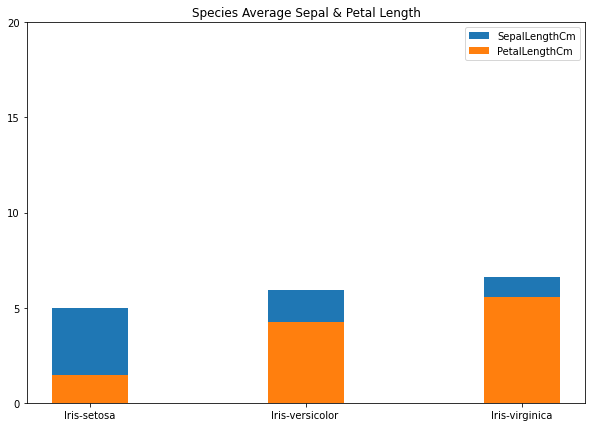

In [15]:
# Species Average Sepal&Petal Length Comparing Plot
import numpy as np
import matplotlib.pyplot as plt
 
N = 3
 

ind = np.arange(N)  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(mean_data.index, mean_data["SepalLengthCm"], width)
p2 = plt.bar(mean_data.index, mean_data["PetalLengthCm"],width)
 

plt.title("Species Average Sepal & Petal Length")
plt.xticks(ind, ('Iris-setosa', 'Iris-versicolor ', 'Iris-virginica'))
plt.yticks(np.arange(0, 23, 5))
plt.legend((p1[0], p2[0]), ('SepalLengthCm', 'PetalLengthCm'))
 
plt.show()

In [16]:
colors = np.random.rand(150)

fig = px.scatter(data, x="PetalLengthCm", y="PetalWidthCm", color="Species",hover_data=['Species'],symbol="Species",width=600, height=400)
fig.show()

In [17]:
fig = px.scatter(data, x="SepalLengthCm", y="SepalWidthCm", color="Species",hover_data=['Species'],symbol="Species",width=800, height=400)
fig.show()

# In this case, Iris-virginica and Irıs-versicolor have nearly same values. If we want to separate and do categorize, we can use  "PetalLengthCm" and "PetalWidthCm" values more for classification / clustering.
# We can see results above

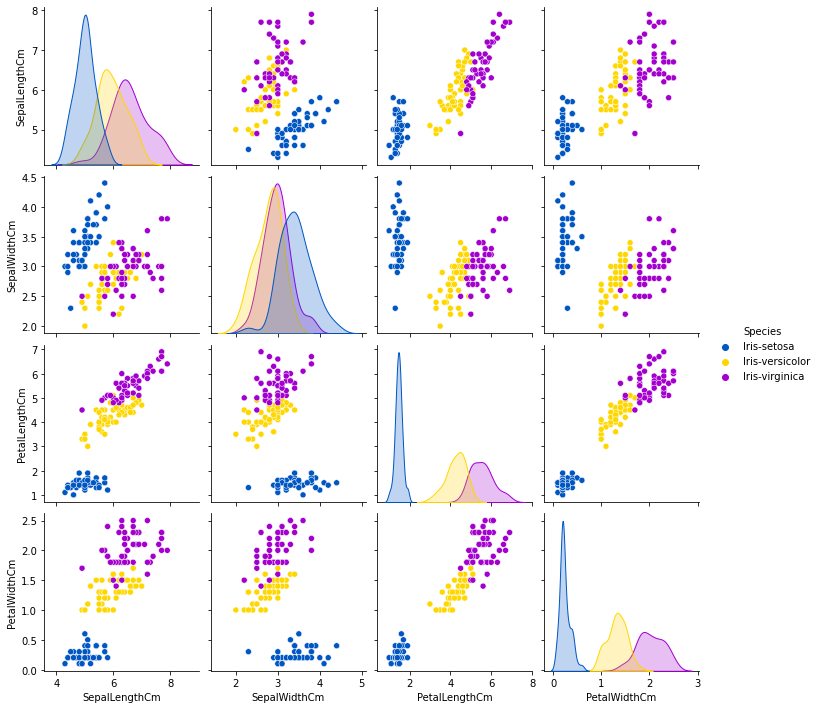

In [18]:

g = sns.pairplot(data, hue='Species', markers='o',palette='prism')
# NOTE : Diagonal Plots Means, the diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.